In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [89]:
# 타이타닉 데이터셋
titanic = pd.read_csv('./data/train.csv')
titanic.shape

(891, 12)

## Imputing

In [52]:
# null값 비중 확인
titanic.isnull().sum() / len(titanic) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [53]:
# null값 비중이 70% 이상인 feature는 제거
titanic = titanic.drop('Cabin', axis=1)

In [54]:
#결측치가 존재하는 feature의 data type 확인
columns = ['Age', 'Embarked']
titanic[columns].dtypes

Age         float64
Embarked     object
dtype: object

In [55]:
#Age는 중위값으로 Null값을 채워줌
titanic['Age'] = titanic['Age'].fillna(titanic["Age"].median())

In [56]:
#Embarked의 경우 object 타입이므로 새로운 범주 생성
titanic['Embarked'] = titanic['Embarked'].fillna('U')

## Encoding

In [57]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [58]:
# Name, Sex, Ticket, Embarked가 object type
columns = ['Name', 'Sex', 'Ticket', 'Embarked']
for c in columns:
    print(c, titanic[c].nunique())

Name 891
Sex 2
Ticket 681
Embarked 4


In [59]:
#Sex와 Embarked에 대해 One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
SEX_OHE = OHE.fit_transform(titanic['Sex'].to_numpy().reshape(-1,1)).toarray()
titanic[OHE.categories_[0]] = SEX_OHE

OHE = OneHotEncoder()
Embarked_OHE = OHE.fit_transform(titanic['Embarked'].to_numpy().reshape(-1,1)).toarray()
titanic[OHE.categories_[0]] = Embarked_OHE

## Outlier Removing

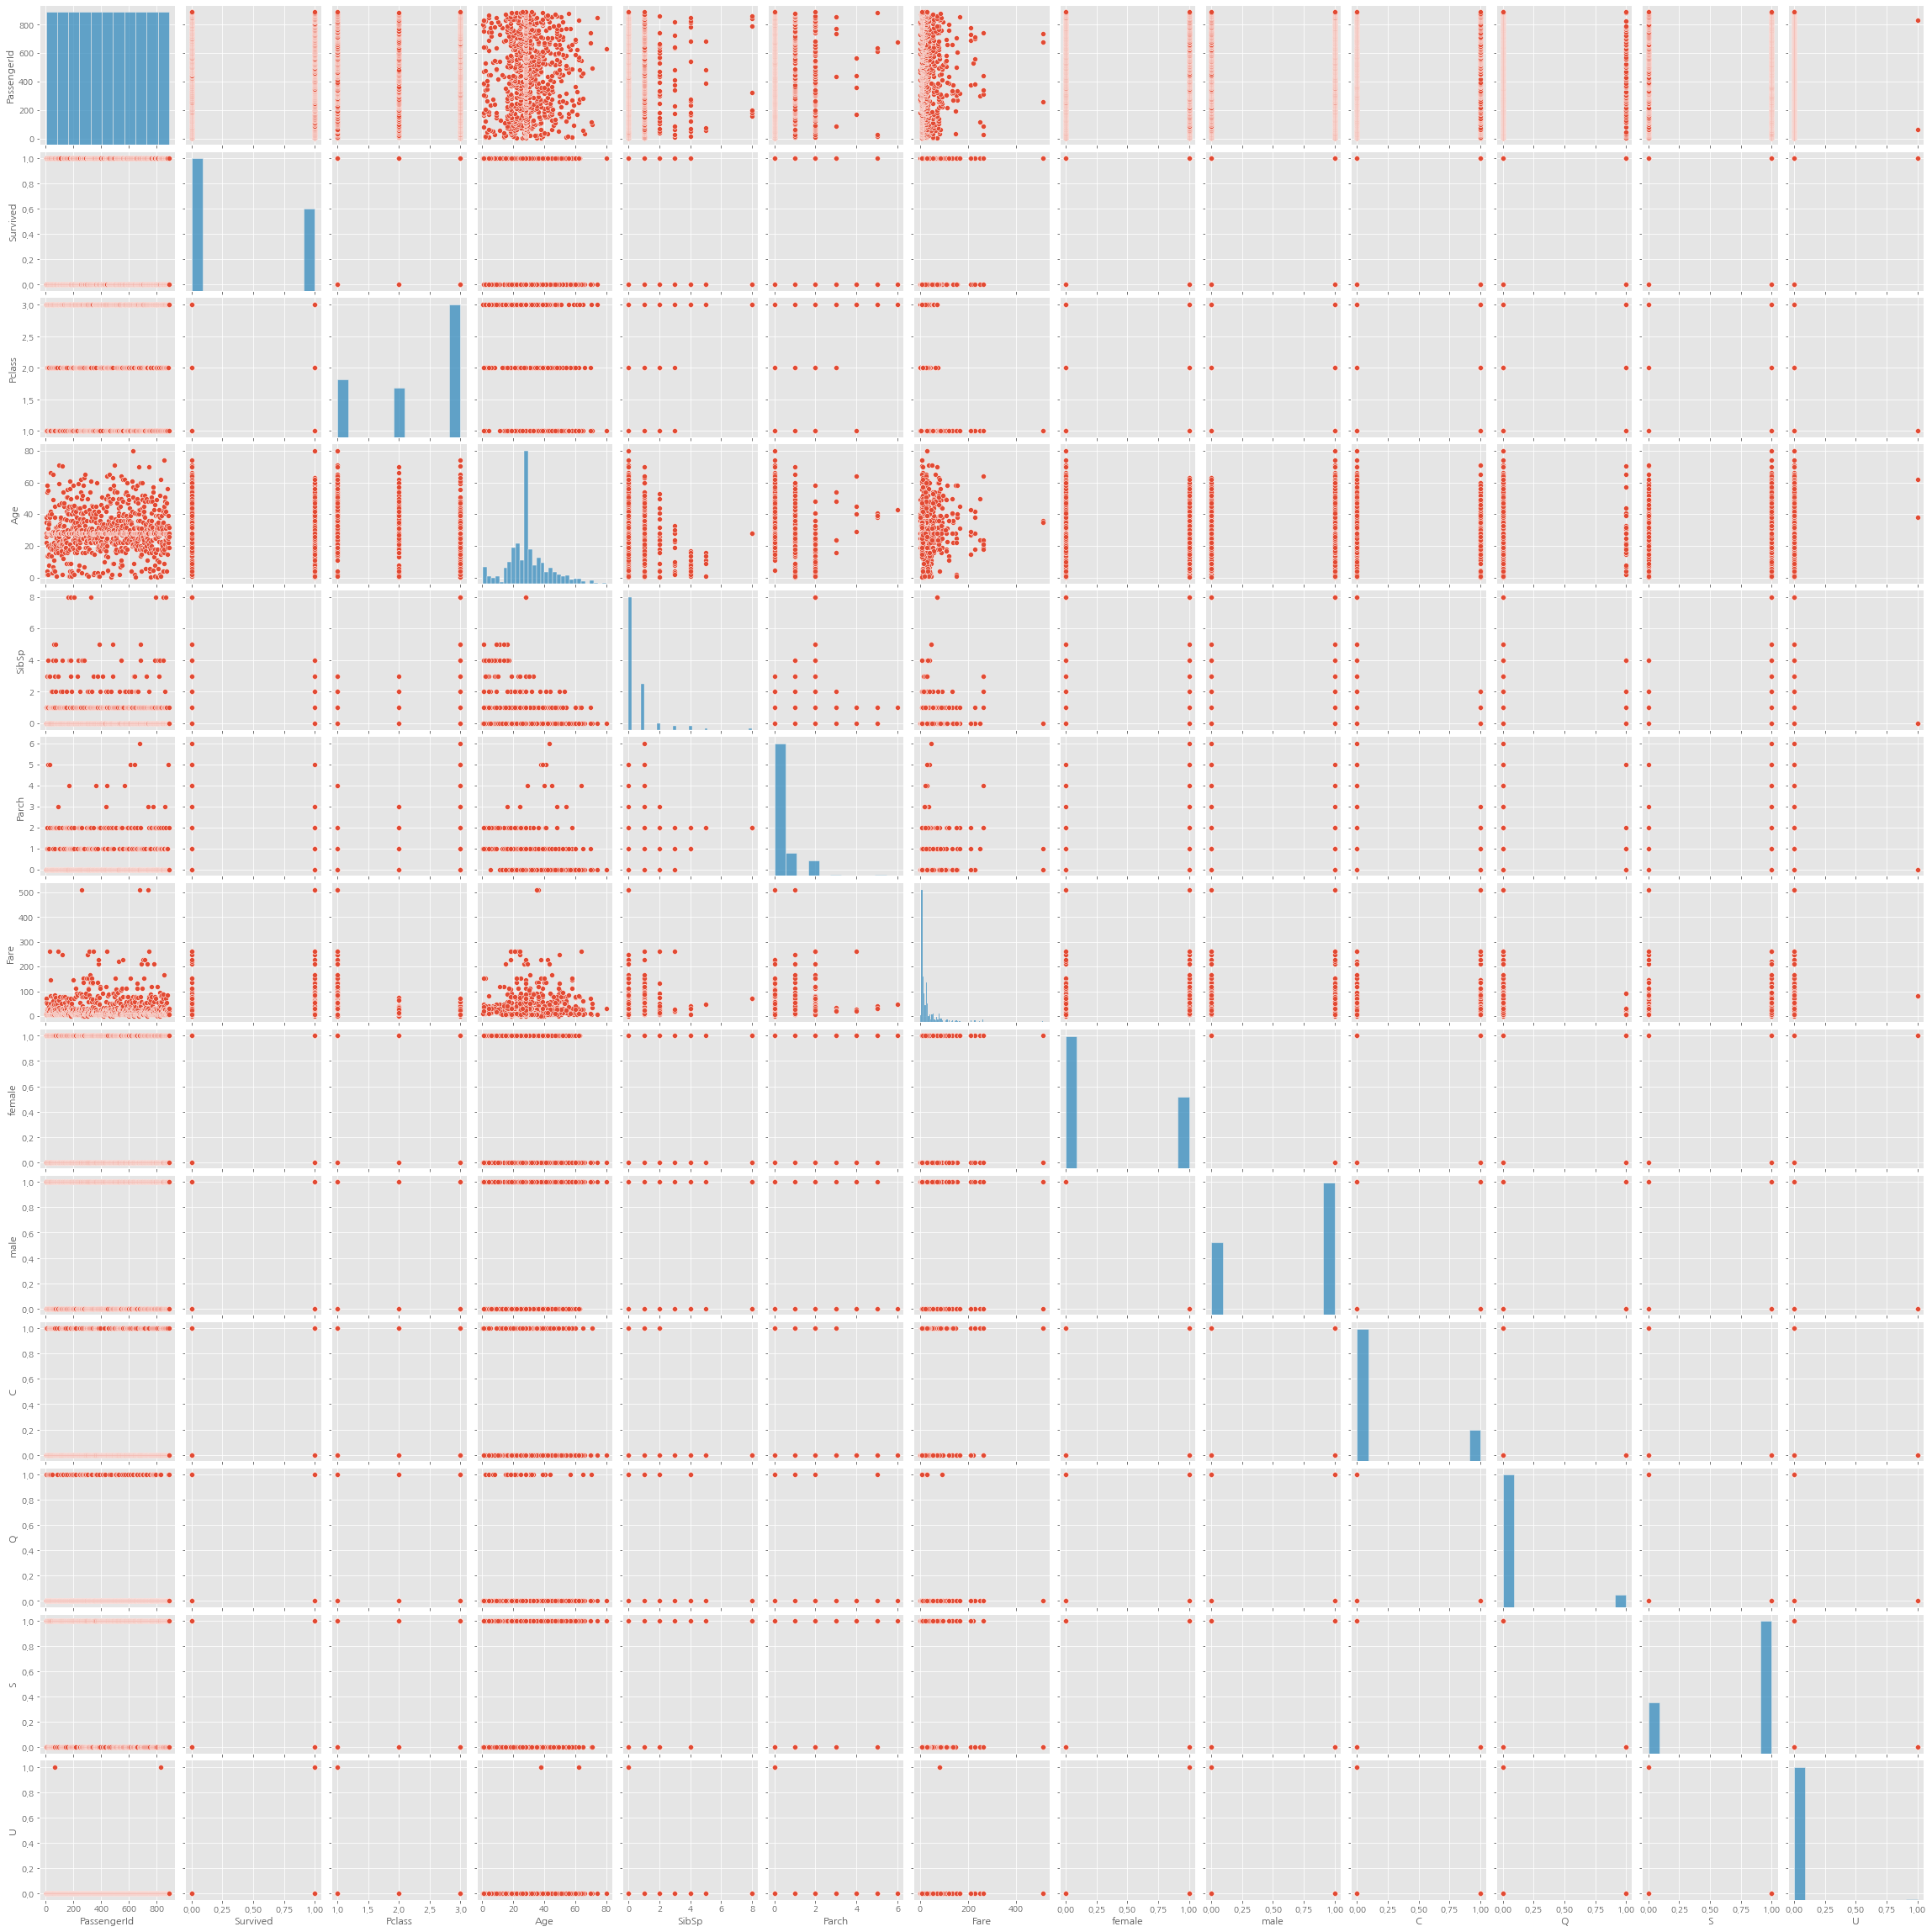

In [64]:
sns.pairplot(titanic)

In [67]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'female', 'male', 'C', 'Q', 'S',
       'U'],
      dtype='object')

<AxesSubplot:ylabel='Age'>

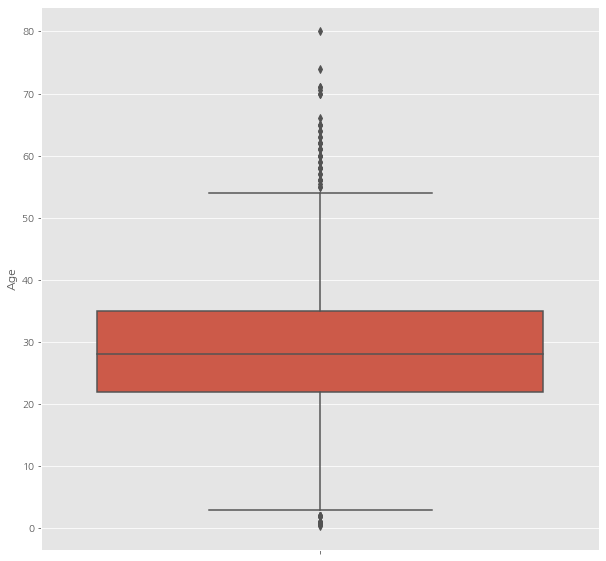

In [71]:
plt.figure(figsize=(10,10))
sns.boxplot(data=titanic, y='Age')

In [74]:
q1=titanic['Age'].quantile(0.25)
q3=titanic['Age'].quantile(0.75)
iqr=q3-q1
iqr

13.0

In [84]:
condition=(titanic['Age'] <= q3+1.5*iqr) & (titanic['Age'] >= q1-1.5*iqr)
titanic = titanic[condition]

<AxesSubplot:ylabel='Age'>

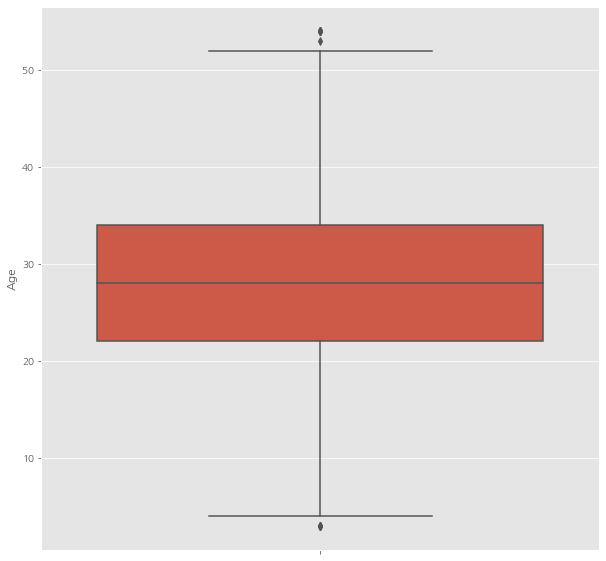

In [85]:
plt.figure(figsize=(10,10))
sns.boxplot(data=titanic, y='Age')

## Correlation Removing

<AxesSubplot:>

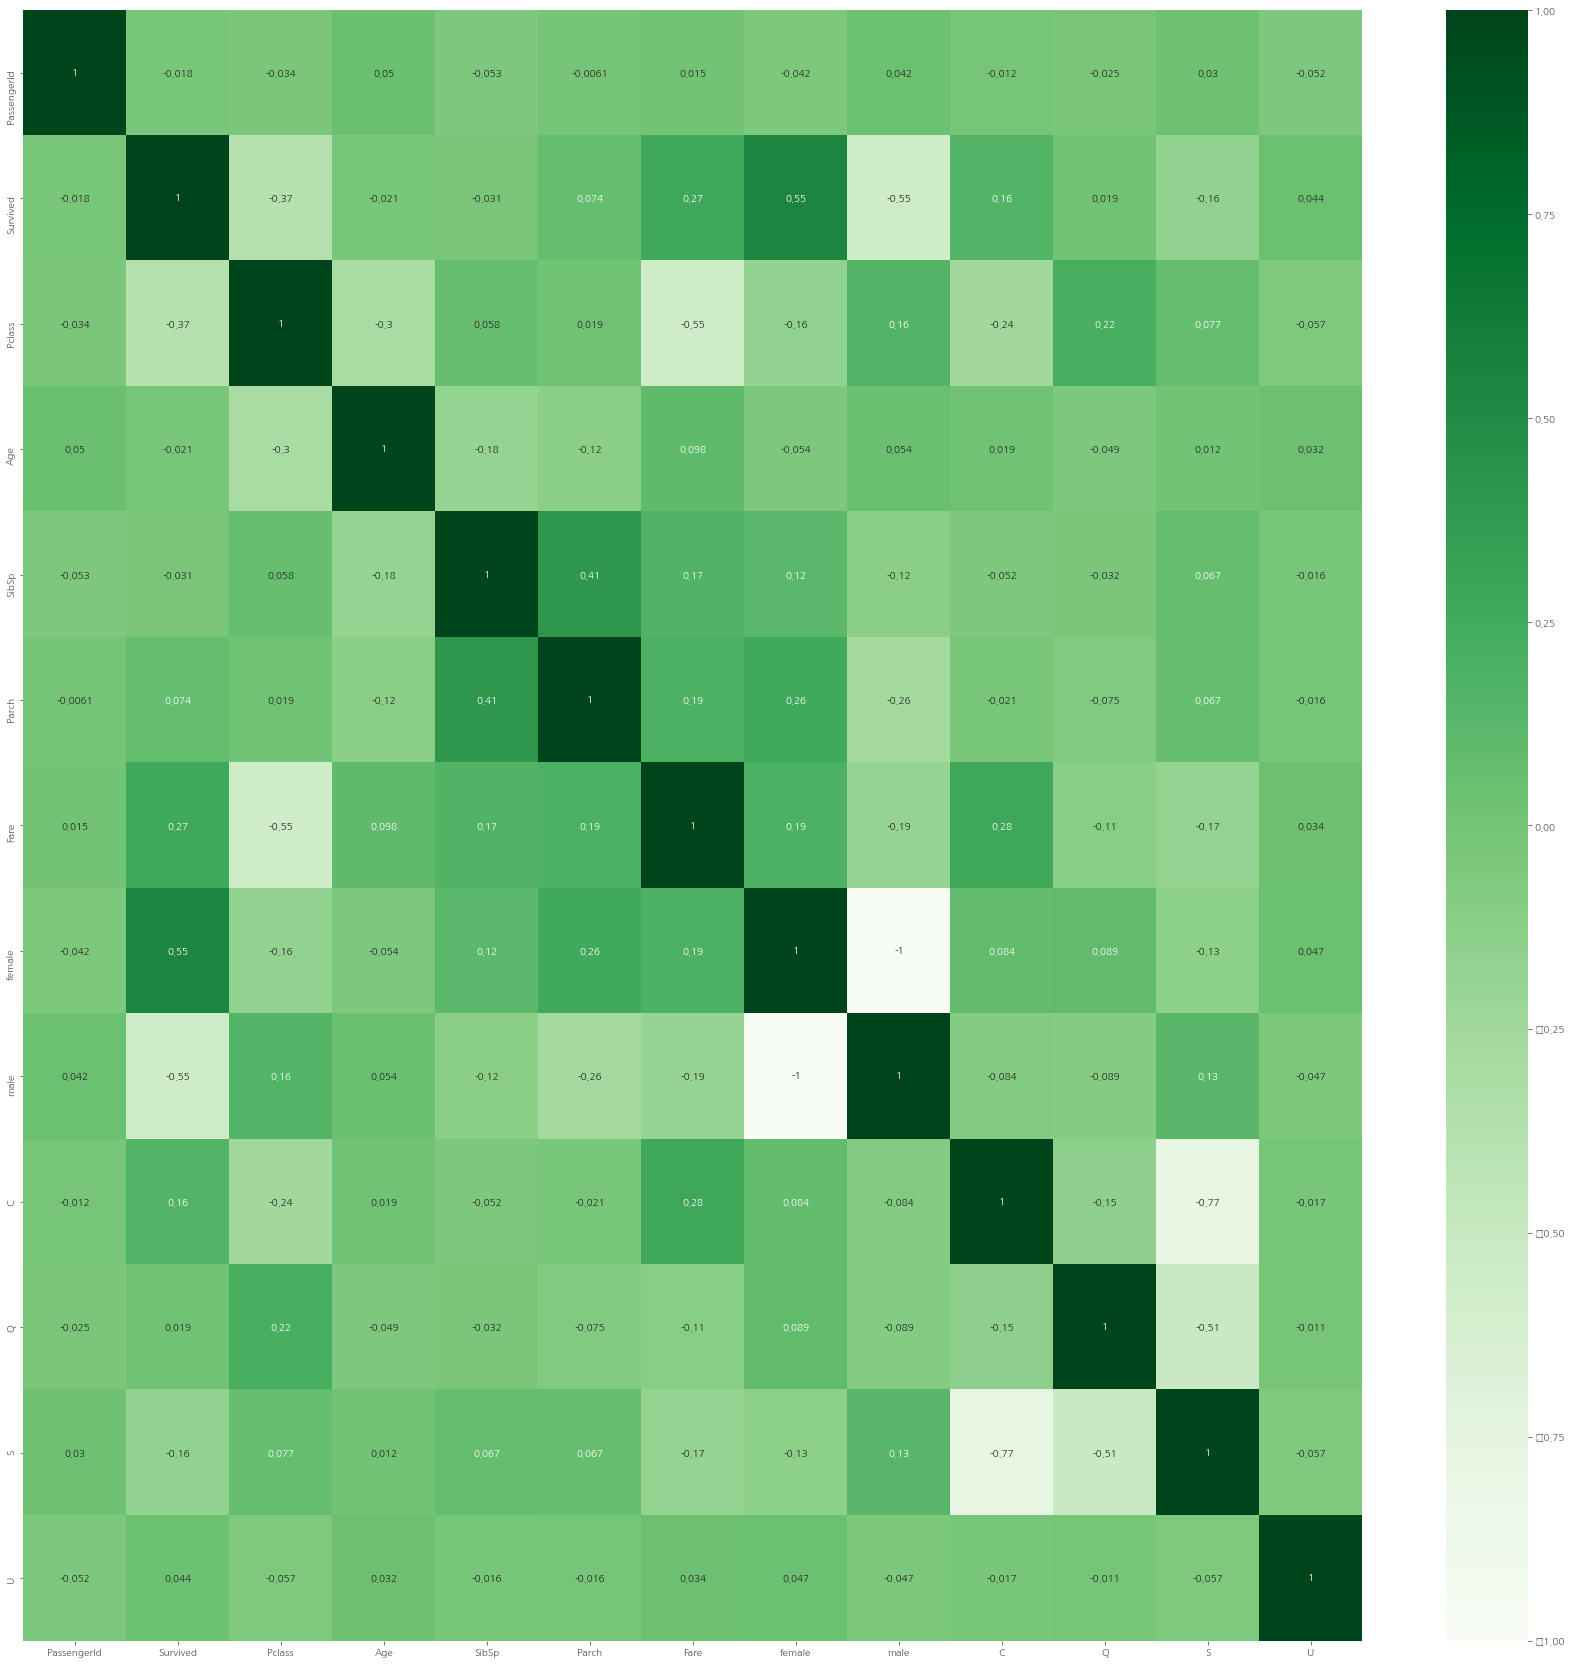

In [86]:
plt.figure(figsize=(30,30))
sns.heatmap(titanic.corr(), annot=True, cmap='Greens')

In [87]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0,1.0,0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,0.0,0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,1.0,0.0,0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.0,1.0,1.0,0.0,0.0,0.0
